# Урок 3. Логистическая регрессия. Log Loss

<h1>План урока<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-1">Логистическая регрессия</a></span></li><li><span><a href="#Логистическая-функция-потерь" data-toc-modified-id="Логистическая-функция-потерь-2">Логистическая функция потерь</a></span></li><li><span><a href="#Пример" data-toc-modified-id="Пример-3">Пример</a></span></li><li><span><a href="#Домашние-задания" data-toc-modified-id="Домашние-задания-4">Домашние задания</a></span></li></ul></div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

### Логистическая регрессия

Обобщение линейной регрессии на задачу классификации.

<img src='img/algorithmes-de-classification-regression-logistique-9.jpg' width=400 align='left'> </img>

$\vec{y}=X\vec{w}$

In [4]:
Проблемы:  
1) Если предсказывать с помощью линейной регрессии, то могут появляться такие числа:   
np.dot(X, w) = [-12, 2, 1.5, 0.0005, 1000 ...]  
2) MSE, как функция потерь, не подходит.

SyntaxError: ignored

In [ ]:
p = [0, 1] - вероятность

In [ ]:
$odds = \frac{p}{1 - p} = \frac{p_1}{p_0}$ - шансы

In [ ]:
0.5 / (1 - 0.5)

In [ ]:
0.01 / (1 - 0.01)

In [ ]:
0.9 / (1 - 0.9)

In [ ]:
p = 1e-2
np.log(p / (1 - p))                       

In [ ]:
p = 0.99
np.log(p / (1 - p))

In [ ]:
$$X\vec{w} = \ln\Big(\frac{\vec{p}}{1 - \vec{p}}\Big)$$
$$\exp(X\vec{w}) = \frac{\vec{p}}{1 - \vec{p}}$$
$$(1-\vec{p})\exp(X\vec{w}) = \vec{p}$$
$$\exp(X\vec{w})-\vec{p}\exp(X\vec{w}) = \vec{p}$$
$$\exp(X\vec{w})=\vec{p}(1+\exp(X\vec{w}))$$
$$\vec{p}=\frac{\exp{(X\vec{w})}}{1+\exp{(X\vec{w})}}$$
$$\vec{p}=\frac{1}{1+\exp{(-X\vec{w})}}=\text{sigmoid}(-X\vec {w})$$

In [13]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

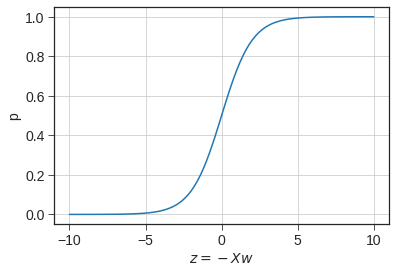

In [14]:
# сигмоида
z = np.linspace(-10, 10, 101)
probabilities = sigmoid(z)
plt.plot(z, probabilities)
plt.xlabel('$z=-Xw$')
plt.ylabel('p')
plt.grid();

### Логистическая функция потерь 

для одного объекта: $\text{logloss}=-{y} \ln({p}) - (1-{y})\ln(1-{p})$

$y=0/1$ - истинный класс   
$p=[0,1]$ - ответ алгоритма


In [5]:
def calc_logloss(y, y_pred):
    a = np.clip (y, 0.01, 0.99)
    a_pred = np.clip (y_pred, 0.01, 0.99)
    err = np.mean(- a * np.log(a_pred) - (1.0 - a) * np.log(1.0 - a_pred))
    return err



In [6]:
# Пример применения
y_true = 0
y_pred = 1

calc_logloss(y_true, y_pred)

4.559218987486745

$$\text{logloss}=\frac{1}{n}\big(-\vec{y} \ln(\vec{p}) - (1-\vec{y})\ln(1-\vec{p})\big)$$
$$\vec{p}=\text{sigmoid}(-X{\vec{w}})=\frac{1}{1+\text{exp}(-X{\vec{w}})}$$
$$\frac{\mathrm d}{\mathrm d\vec{w}}\text{logloss}=\frac{1}{n}(\vec{p}-\vec{y})X$$
$$\vec{w}=\vec{w}-\alpha \frac{1}{n}(\vec{p}-\vec{y})X$$

In [ ]:
### Пример

In [7]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]],  # квалификация репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # поступил или нет ученик на специальность Математика
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [8]:
def standard_scaler(x):
    res = (x - x.mean()) / x.std()
    return res

X_st = X.copy()
X_st[:, 2] = standard_scaler(X[:, 2])
X_st[:, 2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

In [9]:
# логистическая регрессия
def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        y_pred = sigmoid(z) # p [0, 1]
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot((y_pred - y), X))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [18]:
w = eval_LR_model(X_st, y, 1000, 6e-1)

100 [-1.81166057 -0.96465672  0.91089858  2.6474193 ] 0.4513111565314807
200 [-3.19827567 -1.00435891  0.4012843   3.53896433] 0.4032505534921082
300 [-4.28257014 -1.02721094 -0.02094291  4.23932749] 0.37390397717699797
400 [-5.16608083 -1.05575915 -0.35257265  4.8373846 ] 0.35439676167516543
500 [-5.91428325 -1.08792409 -0.6228076   5.36456272] 0.3404185489744527
600 [-6.5682665  -1.12143798 -0.85195956  5.83948957] 0.32976953767501227
700 [-7.15423453 -1.15515809 -1.05254136  6.27479246] 0.32124616420275254
800 [-7.68942527 -1.18856924 -1.23241966  6.67931381] 0.3140996954814835
900 [-8.18555506 -1.22145187 -1.39674368  7.05936843] 0.30792786817861606
1000 [-8.650831   -1.25372329 -1.54901597  7.41955336] 0.30248237275468814


6e-1 (1000) [-8.650831   -1.25372329 -1.54901597  7.41955336] 0.30248237275468814


2e-4 (1000) [ 0.42368488 -0.36360644  0.6425442   1.41506565] 0.8858675816779247


In [16]:
def calc_pred_proba(X, w):
  y_pred = sigmoid(np.dot(X_st, w))
  y_pred_proba = y_pred.round(2)
  return y_pred_proba

def calc_pred(X, w, div=0.5):
  fordiv = calc_pred_proba(X,w)
  y_pred = np.where(fordiv > div, 1, 0)
  return y_pred

In [23]:
y_pred = calc_pred (X, w, 0.5)
print (y_pred, y)

[0 0 1 0 1 0 1 0 0 1] [0 0 1 0 1 0 1 0 1 1]


In [26]:
def err_matrix(y, y_pred):
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  index = 0
  while index < len(y):
    if y[index] == 1:
      if y_pred[index] == 1:
        tp += 1
        index+=1
      else:
        fn += 1
        index+=1
    else:
      if y_pred[index] == 0:
        tn += 1
        index+=1
      else:
        fp += 1
        index+=1
  return tp, tn, fp, fn
      


In [31]:
err_matrix(y, y_pred)
tp = err_matrix(y, y_pred) [0]
tn = err_matrix(y, y_pred) [1]
fp = err_matrix(y, y_pred) [2]
fn = err_matrix(y, y_pred) [3]

In [36]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp) 
recall = tp/(tp+fn)
f1 = (2*precision*recall)/(precision+recall)
print (accuracy, precision, recall, f1)

0.9 1.0 0.8 0.888888888888889


In [ ]:
### Домашние задания

1. Измените функцию `calc_logloss` так, чтобы нули по возможности не попадали в `np.log` (как вариант - использовать `np.clip` или `np.where`).  
2. На данных из урока изучите влияние гиперпараметров на ошибку алгоритма. Подберите аргументы функции `eval_LR_model` для логистической регрессии таким образом, чтобы log loss не превышал значение `0.3` `(0.1).` Как изменились веса?
3. Создайте функцию `calc_pred_proba`, возвращающую предсказанную вероятность класса 1 (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`, на выходе - массив `y_pred_proba`).
4. Создайте функцию `calc_pred`, возвращающую предсказанный класс (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`, а также порог вероятности, на выходе - массив `y_pred`).
5. (\*) Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.
6. (\*) Могла ли модель переобучиться? Почему?

Методичка (исправленная) https://colab.research.google.com/drive/1DxLcLdf2Lns12qOqGVvapDha5tiltM1f?usp=sharing